<a href="https://colab.research.google.com/github/Marllysonnn/Advices/blob/main/Fauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Base de Dados Sobre Animais em Riscos de Extinção



In [1]:
import pandas as pd

fauna = pd.read_csv('/content/Fauna.csv')
fauna

#"VU" significa que a espécie está vulnerável e corre riscos de extinção no futuro bem próximo.
#"EN" mostra que a espécie está em perigo.
#"CR" significa criticamente em perigo,
#"CR (PEX)" provavelmente extinto,
#"EW" quer dizer que a espécie está extinta na natureza,
#"ER" mostra que a espécie está extinta regionalmente e "EX" quer dizer que espécie está extinta.

,grupo,ordem,familia,especie_ou_subespecie,categoria,lista_2014
0,invertebrados_terrestres,Amblypygi,Charinidae,Charinus acaraje,VU,1
1,invertebrados_terrestres,Amblypygi,Charinidae,Charinus asturius,EN,1
2,invertebrados_terrestres,Amblypygi,Charinidae,Charinus caatingae,CR,0
3,invertebrados_terrestres,Amblypygi,Charinidae,Charinus eleonorae,EN,1
4,invertebrados_terrestres,Amblypygi,Charinidae,Charinus ferreus,CR,0
...,...,...,...,...,...,...
1253,peixes,Squatiniformes,Squatinidae,Squatina occulta,CR,1
1254,peixes,Syngnathiformes,Syngnathidae,Hippocampus erectus,VU,1
1255,peixes,Syngnathiformes,Syngnathidae,Hippocampus patagonicus,VU,1
1256,peixes,Syngnathiformes,Syngnathidae,Hippocampus reidi,VU,1


In [2]:
fauna.isnull().sum()

grupo                    0
ordem                    0
familia                  0
especie_ou_subespecie    0
categoria                0
lista_2014               0
dtype: int64

In [3]:
import sqlite3

con = sqlite3.connect("fauna.db")
fauna.to_sql("fauna", con)
con.commit()
con.close()

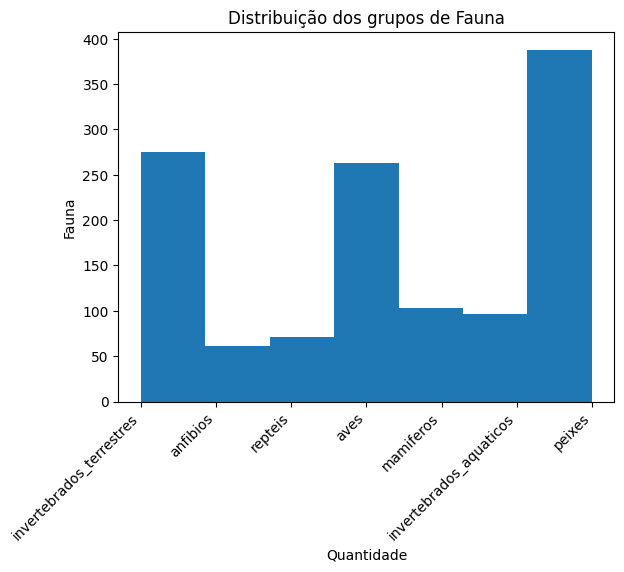

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('fauna.db')
query = "SELECT grupo FROM fauna"
fauna = pd.read_sql_query(query, conn)

plt.hist(fauna['grupo'], bins=len(fauna['grupo'].unique()))
plt.xlabel('Quantidade')
plt.ylabel('Fauna')
plt.title('Distribuição dos grupos de Fauna')

plt.xticks(rotation=45, ha='right')

plt.show()
conn.close()

In [5]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('fauna.db')

query = """
SELECT grupo, COUNT(*) AS total
FROM fauna
WHERE lista_2014 = 1
GROUP BY grupo
ORDER BY total DESC
"""

fauna_em_risco = pd.read_sql_query(query, conn)

print(fauna_em_risco)

conn.close()

                      grupo  total
0                    peixes    346
1                      aves    222
2  invertebrados_terrestres    202
3                 mamiferos    100
4   invertebrados_aquaticos     72
5                   repteis     71
6                  anfibios     25


In [6]:
import pandas as pd
conn = sqlite3.connect('fauna.db')
query = """
SELECT categoria, COUNT(*) AS total
FROM fauna
GROUP BY categoria
ORDER BY total DESC
"""
lista_categoria = pd.read_sql_query(query, conn)
print(lista_categoria)
conn.close()

  categoria  total
0        VU    465
1        EN    425
2        CR    322
3  CR (PEX)     36
4        EX      6
5        RE      3
6        EW      1


In [9]:
import pandas as pd

fauna = pd.read_csv('Fauna.csv')

especies_2014 = fauna[fauna['lista_2014'] == 1]

contagem_por_familia = especies_2014['familia'].value_counts().reset_index()
contagem_por_familia.columns = ['familia', 'num_especies']
print(contagem_por_familia)

             familia  num_especies
0          Rivulidae           108
1       Loricariidae            27
2         Characidae            27
3        Nymphalidae            26
4     Thamnophilidae            24
..               ...           ...
267        Tapiridae             1
268     Bradypodidae             1
269  Myrmecophagidae             1
270         Physidae             1
271        Gomphidae             1

[272 rows x 2 columns]


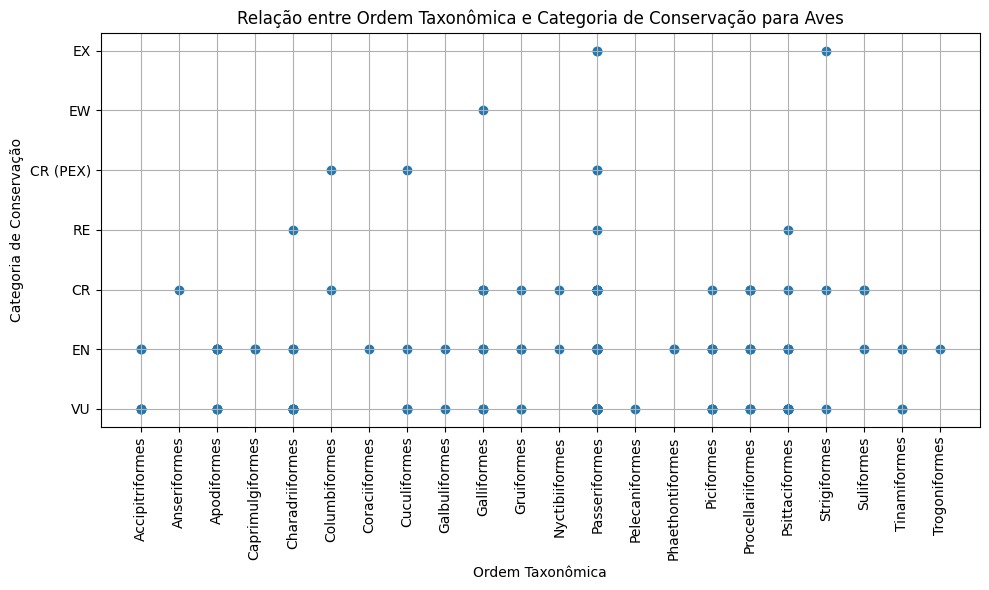

In [10]:
import matplotlib.pyplot as plt

aves = fauna[fauna['grupo'] == 'aves']

plt.figure(figsize=(10, 6))
plt.scatter(aves['ordem'], aves['categoria'])
plt.title('Relação entre Ordem Taxonômica e Categoria de Conservação para Aves')
plt.xlabel('Ordem Taxonômica')
plt.ylabel('Categoria de Conservação')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()

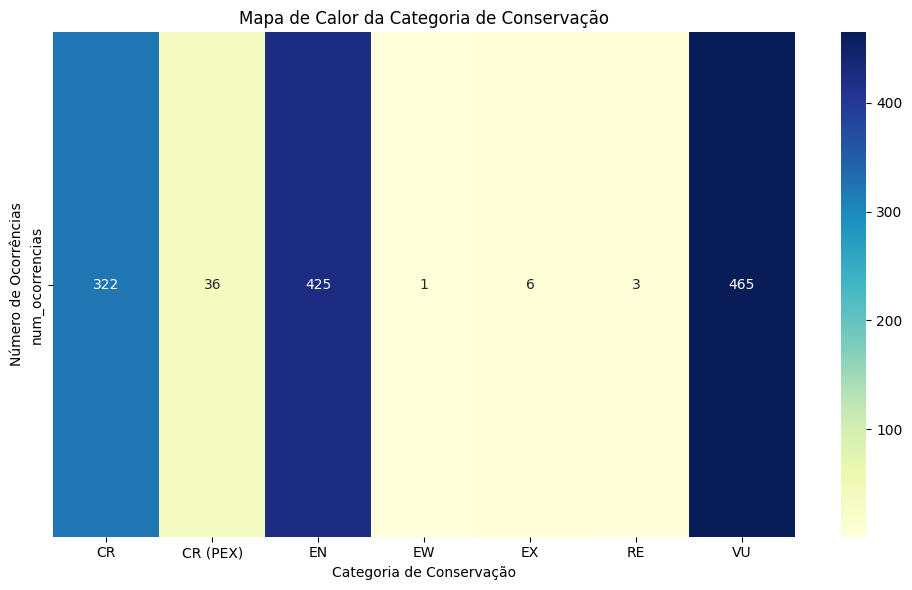

In [11]:
import seaborn as sns

contagem_categoria = fauna['categoria'].value_counts().reset_index()
contagem_categoria.columns = ['categoria', 'num_ocorrencias']

plt.figure(figsize=(10, 6))
sns.heatmap(data=contagem_categoria.pivot_table(index='categoria', aggfunc='sum').T, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Mapa de Calor da Categoria de Conservação')
plt.xlabel('Categoria de Conservação')
plt.ylabel('Número de Ocorrências')
plt.tight_layout()

plt.show()

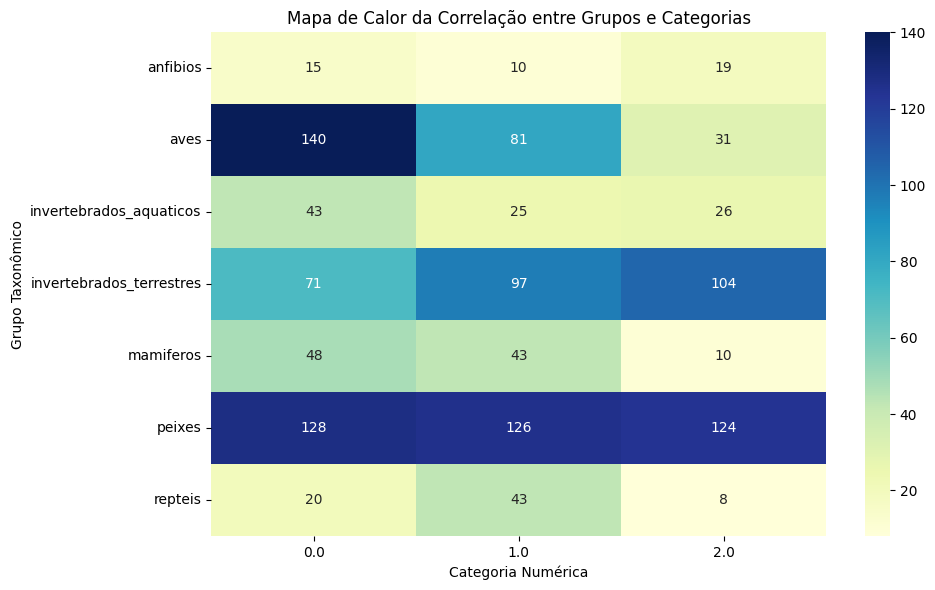

In [15]:
import seaborn as sns

mapeamento_categorias = {'VU': 0, 'EN': 1, 'CR': 2, 'NT': 3,}
fauna['categoria_numerica'] = fauna['categoria'].map(mapeamento_categorias)

contagem_grupo_categoria = fauna.groupby(['grupo', 'categoria_numerica']).size().reset_index(name='num_ocorrencias')

plt.figure(figsize=(10, 6))
heatmap_data = contagem_grupo_categoria.pivot_table(index='grupo', columns='categoria_numerica', values='num_ocorrencias', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Mapa de Calor da Correlação entre Grupos e Categorias')
plt.xlabel('Categoria Numérica')
plt.ylabel('Grupo Taxonômico')
plt.tight_layout()

plt.show()

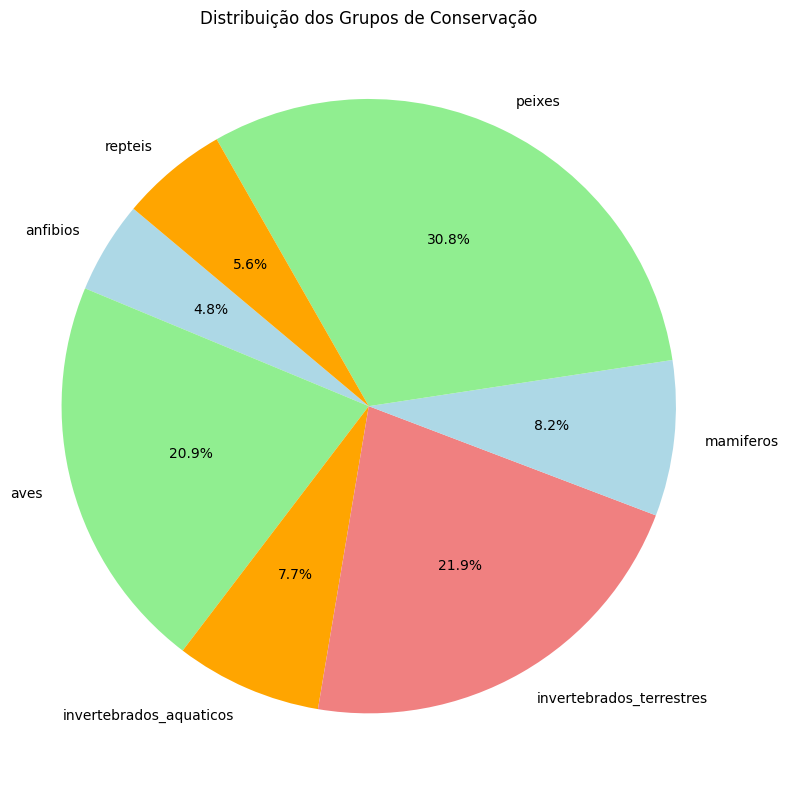

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('/content/fauna.db')

query = "SELECT grupo, COUNT(*) AS num_ocorrencias FROM fauna GROUP BY grupo;"

resultados = pd.read_sql_query(query, conn)

conn.close()

plt.figure(figsize=(8, 8))
resultados.set_index('grupo')['num_ocorrencias'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Distribuição dos Grupos de Conservação')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()

plt.show()

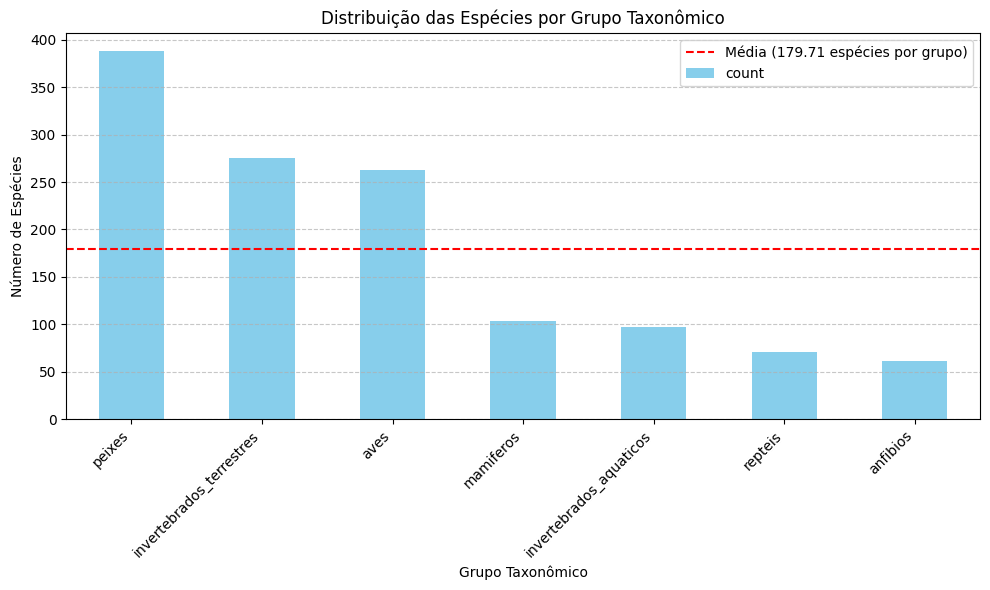

In [17]:
import matplotlib.pyplot as plt

contagem_grupo = fauna['grupo'].value_counts()

plt.figure(figsize=(10, 6))
contagem_grupo.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Espécies por Grupo Taxonômico')
plt.xlabel('Grupo Taxonômico')
plt.ylabel('Número de Espécies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

num_total_especies = contagem_grupo.sum()
num_grupos = len(contagem_grupo)
media_especies_por_grupo = num_total_especies / num_grupos
plt.axhline(media_especies_por_grupo, color='red', linestyle='--', label=f'Média ({media_especies_por_grupo:.2f} espécies por grupo)')

plt.legend()
plt.show()

In [ ]:
import pandas as pd
conn = sqlite3.connect('/content/fauna.db')
query = """
SELECT especie_ou_subespecie
FROM fauna
WHERE categoria = 'EX';
"""
fauna_extintas = pd.read_sql_query(query, conn)
print(fauna_extintas)
conn.close()

          especie_ou_subespecie
0                Boana cymbalum
1        Phrynomedusa fimbriata
2  Cichlocolaptes mazarbarnetti
3              Philydor novaesi
4          Glaucidium mooreorum
5          Noronhomys vespuccii
